# Real-world Data Wrangling

## Data No 1: 120 years of Olympic history: athletes and results
## Data No 2: Wrangled Pakistan largest ecommerce dataset

### 1. Gather data

#### Data No 1:
120 years of olympic history is downloaded using kaggle api. This involves installing pip kaggle. Secondly, generating kaggle token. Then, we copied the dataset api and we download data using kaggle api. Lastly, we unzip this data by importing zipfile and then we assess data using pandas.

#### Data No 2:
Pakistan largest ecommerce dataset is downloaded manually from kaggle and start using with pandas.

# **Dataset 1:**
### Gathering data by accessing kaggle API.


In [1]:
#Importing all useful directories for this project:

import pandas as pd
import numpy as np
import zipfile
import pycountry
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
# Installing kaggle
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: kaggle.json: No such file or directory


In [4]:
#Downloading dataset kaggle api
!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results

120-years-of-olympic-history-athletes-and-results.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
dataset = '/Users/bilal/Downloads/Project/120-years-of-olympic-history-athletes-and-results.zip'

In [6]:
# Extracting the files from the downloaded zipfile
with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
df_olympic = pd.read_csv('athlete_events.csv')
df_olympic.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Dataset 2
### Download data manually from kaggle.

In [8]:
data_environment = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv',encoding='latin-1')
data_environment.head()


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [9]:
data_environment.drop(data_environment[data_environment['Element'] == 'Standard Deviation'].index, inplace = True)
data_environment.head

<bound method NDFrame.head of       Area Code         Area  Months Code               Months  Element Code  \
0             2  Afghanistan         7001              January          7271   
2             2  Afghanistan         7002             February          7271   
4             2  Afghanistan         7003                March          7271   
6             2  Afghanistan         7004                April          7271   
8             2  Afghanistan         7005                  May          7271   
...         ...          ...          ...                  ...           ...   
9646       5873         OECD         7016          DecJanFeb          7271   
9648       5873         OECD         7017          MarAprMay          7271   
9650       5873         OECD         7018          JunJulAug          7271   
9652       5873         OECD         7019          SepOctNov          7271   
9654       5873         OECD         7020  Meteorological year          7271   

         

In [10]:
data_e_merge = pd.melt(frame = data_environment, id_vars = ['Area Code','Area','Months Code','Months','Element Code','Element','Unit'], var_name = 'Year', value_name= 'Temperature change')
data_e_merge.sample(10)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature change
116860,50,Cyprus,7003,March,7271,Temperature change,°C,Y1985,-0.627
93809,122,Lesotho,7004,April,7271,Temperature change,°C,Y1980,0.472
117587,95,Honduras,7019,SepOctNov,7271,Temperature change,°C,Y1985,0.380
140787,128,"China, Macao SAR",7011,November,7271,Temperature change,°C,Y1990,1.100
47647,181,Zimbabwe,7017,MarAprMay,7271,Temperature change,°C,Y1970,0.217
20952,175,Guinea-Bissau,7009,September,7271,Temperature change,°C,Y1965,-0.408
4612,5501,Australia and New Zealand,7006,June,7271,Temperature change,°C,Y1961,-0.157
81478,5100,Africa,7018,JunJulAug,7271,Temperature change,°C,Y1977,0.317
97081,26,Brunei Darussalam,7012,December,7271,Temperature change,°C,Y1981,-0.010
135363,1,Armenia,7010,October,7271,Temperature change,°C,Y1989,NaN


In [11]:
#Adding mapping dataset for countries ISO 3 Code
mapping_country = pd.read_csv('continents2.csv')

In [12]:
mapping_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [13]:
# Dropping irrelevant columns
mapping_country.drop('alpha-2', inplace=True, axis=1)
# Remove all columns between column name 'country-code' to 'iso_3166-2' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)
# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)

mapping_country.head()

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [14]:
mapping_country.drop('sub-region', inplace=True, axis=1)
mapping_country.head()

,name,alpha-3,region
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania


In [15]:
mapping_country = mapping_country.rename({'name':'Area','alpha-3':'Country Code'}, axis =1)
mapping_country.head()

,Area,Country Code,region
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania


In [16]:
#Merging mapping dataset with main data environment
df_region = data_e_merge.merge(mapping_country, on='Area', how='left')
df_region

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature change,Country Code,region
0,2,Afghanistan,7001,January,7271,Temperature change,°C,Y1961,0.777,AFG,Asia
1,2,Afghanistan,7002,February,7271,Temperature change,°C,Y1961,-1.743,AFG,Asia
2,2,Afghanistan,7003,March,7271,Temperature change,°C,Y1961,0.516,AFG,Asia
3,2,Afghanistan,7004,April,7271,Temperature change,°C,Y1961,-1.709,AFG,Asia
4,2,Afghanistan,7005,May,7271,Temperature change,°C,Y1961,1.412,AFG,Asia
...,...,...,...,...,...,...,...,...,...,...,...
284847,5873,OECD,7016,DecJanFeb,7271,Temperature change,°C,Y2019,1.527,NaN,NaN
284848,5873,OECD,7017,MarAprMay,7271,Temperature change,°C,Y2019,1.352,NaN,NaN
284849,5873,OECD,7018,JunJulAug,7271,Temperature change,°C,Y2019,1.078,NaN,NaN
284850,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,Y2019,1.233,NaN,NaN


In [17]:
#Removing all irrelevent columns which will not be used in analysis
df_region.drop('Area Code', inplace=True, axis=1)

In [18]:
df_region = df_region.drop(df_region.loc[:, 'Element Code':'Unit'].columns, axis=1)

In [19]:
df_region.drop('Months Code', inplace=True, axis=1)

In [20]:
df_region.head()

,Area,Months,Year,Temperature change,Country Code,region
0,Afghanistan,January,Y1961,0.777,AFG,Asia
1,Afghanistan,February,Y1961,-1.743,AFG,Asia
2,Afghanistan,March,Y1961,0.516,AFG,Asia
3,Afghanistan,April,Y1961,-1.709,AFG,Asia
4,Afghanistan,May,Y1961,1.412,AFG,Asia


In [21]:
#Changing seasons names in the months' category 
#as:{'Dec\x96Jan\x96Feb' → 'Winter', 
#'    Mar\x96Apr\x96May' → 'Spring', 
#'    Jun\x96Jul\x96Aug' → 'Summer',
#'    Sep\x96Oct\x96Nov'→'Fall'}

df_region['Months'].replace({'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug': 'Summer', 'Sep\x96Oct\x96Nov': 'Fall'}, inplace=True)

In [22]:
#Removing y from Year column entries.
df_region['Year'] = df_region['Year'].str[1:]

In [23]:
#Renaming Area column to Country 
df_region = df_region.rename(columns={'Area': 'Country'})

In [24]:
#Reordering the Environment data according to desired values.
df_environment_clean = df_region.reindex(columns=['Country Code', 'Country', 'region','Months', 'Year', 'Temperature change'])

In [25]:
df_environment_clean.rename(columns={'region': 'Region'},inplace=True)

In [50]:
df_environment_clean.sample(25)

,Country Code,Country,Region,Months,Year,Temperature change
240212,NaN,Syrian Arab Republic,NaN,March,2010,2.963
229061,LTU,Lithuania,Europe,April,2008,2.766
186700,SMR,San Marino,Europe,July,1999,0.747
13441,TUN,Tunisia,Africa,December,1963,2.508
265943,BEN,Benin,Africa,Winter,2016,0.445
80126,PNG,Papua New Guinea,Oceania,June,1977,-0.290
100105,SDN,Sudan,Africa,October,1981,NaN
99793,SMR,San Marino,Europe,April,1981,0.856
169183,ABW,Aruba,Americas,Meteorological year,1996,0.875
245438,VUT,Vanuatu,Oceania,October,2011,0.996


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [27]:
df_olympic.describe()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Issue and justification:<br>
Data Completeness: <br>
Olympic data has missing data problems specifically in the columns age, height and weight.<br>
The Medal folder also has a huge chunk of missing value but that is understandable because when athletes don't win any medal they intentionally make it blank. 

### Quality Issue 2:

In [28]:
df_olympic_duplicate = df_olympic[df_olympic.duplicated()]

In [29]:
print(df_olympic_duplicate)

            ID                                 Name Sex   Age  Height  Weight  \
1252       704                   Dsir Antoine Acket   M  27.0     NaN     NaN   
4282      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4283      2449               William Truman Aldrich   M  48.0     NaN     NaN   
4862      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
4864      2777               Hermann Reinhard Alker   M  43.0     NaN     NaN   
...        ...                                  ...  ..   ...     ...     ...   
269994  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269995  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269997  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0     NaN     NaN   
269999  135073   Doris Clare Zinkeisen (-Johnstone)   F  49.0     NaN     NaN   
270200  135173                     Henri Achille Zo   M  58.0     NaN     NaN   

                 Team  NOC 

Issue and justification:<br>
Data Completeness: <br>
Olympic data has 271116 unique values and we can see that there are 1385 duplicated values which should be removed before analysis as it will affect our analysis.

### Tidiness Issue 1:

In [30]:
data_environment.info()
data_environment.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 9654
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     4828 non-null   int64  
 1   Area          4828 non-null   object 
 2   Months Code   4828 non-null   int64  
 3   Months        4828 non-null   object 
 4   Element Code  4828 non-null   int64  
 5   Element       4828 non-null   object 
 6   Unit          4828 non-null   object 
 7   Y1961         4152 non-null   float64
 8   Y1962         4161 non-null   float64
 9   Y1963         4147 non-null   float64
 10  Y1964         4127 non-null   float64
 11  Y1965         4149 non-null   float64
 12  Y1966         4199 non-null   float64
 13  Y1967         4182 non-null   float64
 14  Y1968         4186 non-null   float64
 15  Y1969         4178 non-null   float64
 16  Y1970         4171 non-null   float64
 17  Y1971         4172 non-null   float64
 18  Y1972         4181 non-null 

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,4828.000000,4828.000000,4828.0,4152.000000,4161.000000,4147.000000,4127.000000,4149.000000,4199.000000,4182.000000,...,4510.000000,4529.000000,4483.000000,4527.000000,4501.000000,4494.000000,4484.000000,4496.000000,4486.000000,4486.000000
mean,821.806338,7009.882353,7271.0,0.144488,-0.028981,-0.026252,-0.122131,-0.224178,0.095070,-0.131975,...,1.081963,0.864479,0.900384,0.977267,1.132473,1.326988,1.443926,1.298810,1.312751,1.470953
std,1781.164456,6.038568,0.0,0.796846,0.753350,1.002534,0.775030,0.696759,0.843751,0.724055,...,1.084189,0.920360,1.078090,0.847759,0.976030,0.961638,0.982752,0.920956,1.017460,0.932918
min,1.000000,7001.000000,7271.0,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,7271.0,-0.243000,-0.281000,-0.304000,-0.456500,-0.518000,-0.219000,-0.440000,...,0.612000,0.412000,0.445000,0.584000,0.629000,0.803000,0.974750,0.826750,0.729250,0.959000
50%,153.500000,7009.000000,7271.0,0.057000,-0.033000,0.030000,-0.102000,-0.213000,0.057000,-0.168000,...,1.106000,0.824000,0.843000,0.930000,0.976000,1.234000,1.379000,1.231000,1.168500,1.384000
75%,226.250000,7016.000000,7271.0,0.421000,0.259000,0.363000,0.228500,0.073000,0.382000,0.137000,...,1.584000,1.272000,1.356000,1.324500,1.476000,1.714750,1.841250,1.668000,1.733750,1.883750
max,5873.000000,7020.000000,7271.0,5.771000,4.366000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


Issue and justification:<br> 
Single observation stored in multiple tables <br>
At first glance of data, we can observe that year entry is stored in multiple columns in environment data, which can be considered as tidiness issue because it is a single observation stored in multiple columns. we will add all years into one entry once we clean this data. 

### Tidiness Issue 2: 

In [31]:
data_environment_duplicate = data_environment[data_environment.duplicated()]
print(data_environment_duplicate)

Empty DataFrame
Columns: [Area Code, Area, Months Code, Months, Element Code, Element, Unit, Y1961, Y1962, Y1963, Y1964, Y1965, Y1966, Y1967, Y1968, Y1969, Y1970, Y1971, Y1972, Y1973, Y1974, Y1975, Y1976, Y1977, Y1978, Y1979, Y1980, Y1981, Y1982, Y1983, Y1984, Y1985, Y1986, Y1987, Y1988, Y1989, Y1990, Y1991, Y1992, Y1993, Y1994, Y1995, Y1996, Y1997, Y1998, Y1999, Y2000, Y2001, Y2002, Y2003, Y2004, Y2005, Y2006, Y2007, Y2008, Y2009, Y2010, Y2011, Y2012, Y2013, Y2014, Y2015, Y2016, Y2017, Y2018, Y2019]
Index: []

[0 rows x 66 columns]


Issue and justification:<br>
Multiple variables are stored in one column.<br>
As we can see from the environmental data, In the element table there is two value stored temperature and standard deviation which is not the best approach as it stores two different values. In the data cleaning process, we will remove this many other tables from the data as they do not help in any statistical analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### Olympic Data Cleaning: 
1. Drop duplicate
    - before removing duplicates 271116 and we removed 1385 duplicate rows and now we have 269731 rows
2. Removing non useful columns
3. replacing non zero "Age" values to mean values of age
4. Replacing NAN values in medal with No medal.
    
### Climate Change:

In [32]:
# Droping duplicates:
df_olympic_clean = df_olympic.drop_duplicates()
df_olympic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [33]:
# removing non useful columns
df_olympic_clean = df_olympic_clean.drop(columns = ["Height","Weight","NOC"], axis=1)
df_olympic_clean.head()


,ID,Name,Sex,Age,Team,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Text(0.5, 1.0, 'Age Distribution')

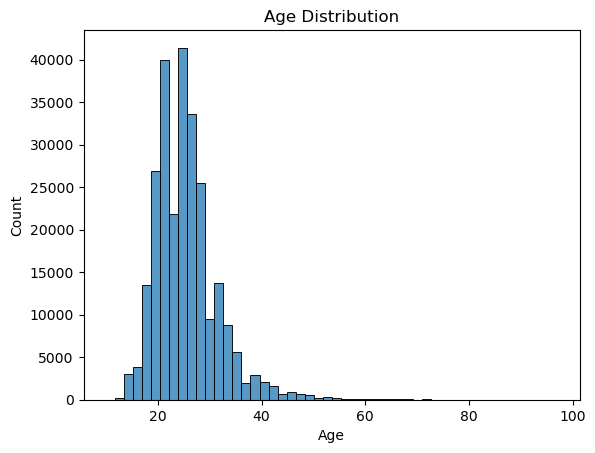

In [34]:
age  = sns.histplot(data=df_olympic_clean, x='Age', bins=50)
age.set_title('Age Distribution')

In [35]:
mean_age = df_olympic_clean['Age'][df_olympic_clean['Age'] != 0].mean()
df_olympic_clean['Age'] = df_olympic_clean['Age'].replace(0, mean_age)


In [36]:
df_olympic_clean['Age'].isnull().sum()
df_olympic_clean['Age'].info()

<class 'pandas.core.series.Series'>
Index: 269731 entries, 0 to 271115
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
260416 non-null  float64
dtypes: float64(1)
memory usage: 4.1 MB


In [37]:
df_olympic_clean['Medal'] = df_olympic_clean['Medal'].fillna('No Medal')
df_olympic_clean['Medal'].sample(25)


105990    No Medal
212811      Silver
227399    No Medal
228177      Silver
150164    No Medal
91500     No Medal
219298    No Medal
261664    No Medal
62726     No Medal
177580    No Medal
263679    No Medal
45300     No Medal
148150    No Medal
5334      No Medal
149839    No Medal
48974     No Medal
193024    No Medal
4983      No Medal
133762    No Medal
44664     No Medal
60824         Gold
48983     No Medal
86843     No Medal
54798     No Medal
234009    No Medal
Name: Medal, dtype: object

### Question:
1. Athlete with most gold medals in history?

In [38]:
gold_medals = df_olympic_clean[df_olympic_clean['Medal'] == 'Gold']
gold_medals_counts = gold_medals['Name'].value_counts()




Name
Mark Andrew Spitz                      9
Larysa Semenivna Latynina (Diriy-)     9
Paavo Johannes Nurmi                   9
Raymond Clarence "Ray" Ewry           10
Michael Fred Phelps, II               23
Name: count, dtype: int64


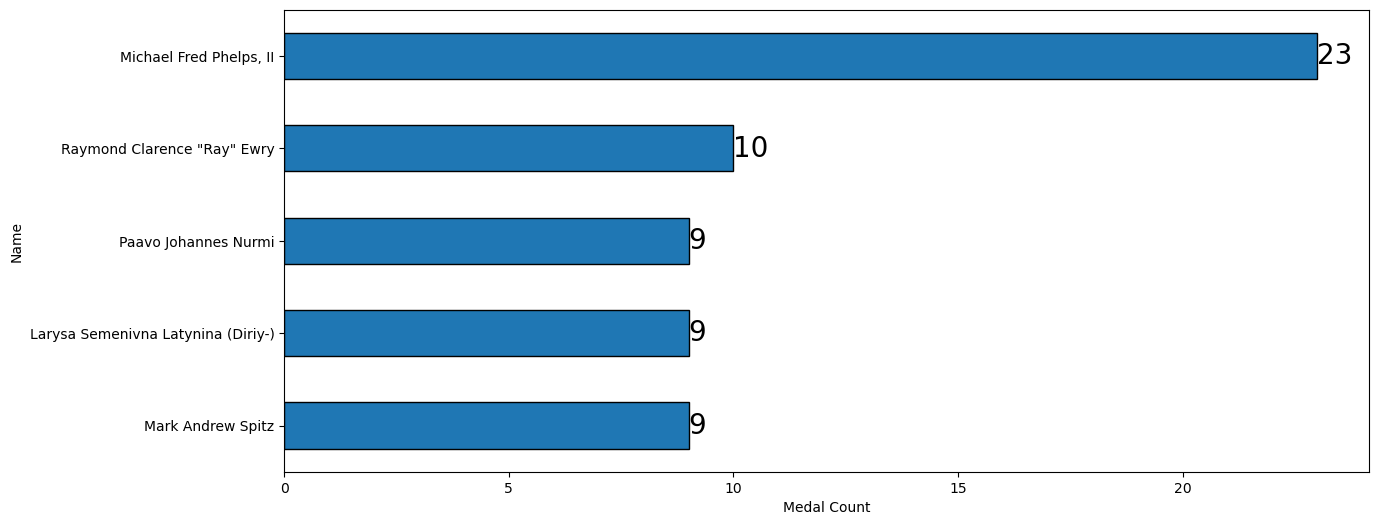

In [39]:
top_medals = gold_medals_counts.head(5).sort_values(ascending=True)
print(top_medals)

ax = top_medals.plot(kind = 'barh', edgecolor = 'black', rot = 0, figsize = [14,6])
ax.bar_label(ax.containers[0], fontsize = 20)

plt.xlabel('Medal Count')
plt.show()

Justification: *FILL IN*

### **Quality Issue 2: FILL IN**

In [40]:
#FILL IN - Apply the cleaning strategy

In [41]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 1: FILL IN**

In [42]:
#FILL IN - Apply the cleaning strategy

In [43]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 2: FILL IN**

In [44]:
#FILL IN - Apply the cleaning strategy

In [45]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [46]:
#FILL IN - Remove unnecessary variables and combine datasets

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [47]:
#FILL IN - saving data

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [48]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [49]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN